# i. Perkenalan

**FINAL PROJECT**

**Nama Kelompok:**
- Kelvin Rizky Novsa
- M Hafiz Juliant
- Nailina Farah
- Raden Rian Girianom

**Latar Belakang:**
Prediksi harga real estate menjadi hal krusial dalam industri properti, baik bagi pembeli maupun penjual. Namun, akses terhadap informasi valuasi properti yang akurat seringkali terbatas, menyebabkan ketidakpastian dan potensi kerugian finansial, terutama di daerah California, Amerika Serikat.

**Problem Statement:**
Dalam menghadapi tantangan ini, kami berkomitmen untuk menciptakan sebuah model prediksi harga rumah dengan tingkat akurasi minimal 80%. Model ini dirancang untuk memberikan akses yang mudah dan dapat diandalkan bagi pemilik rumah yang ingin menjual properti, dengan tujuan mengurangi ketidakpastian dan risiko finansial yang terkait dengan penentuan harga di daerah California, Amerika Serikat.

**Solusi:**
Untuk mengatasi keterbatasan akses informasi valuasi properti, kami merancang sebuah platform berbasis AI yang menggunakan algoritma machine learning. Platform ini mampu menganalisis berbagai faktor valuasi properti, termasuk ukuran, fasilitas, dan gambar properti yang diunggah oleh pengguna. Dengan memanfaatkan analisis gambar dan informasi yang diberikan oleh pengguna, platform ini memberikan estimasi nilai properti secara transparan. Rekomendasi harga yang disesuaikan dengan kondisi pasar saat ini akan disediakan, memberikan pemilik rumah panduan yang tepat untuk menentukan harga properti mereka.

# ii. Import Library

In [1]:
# import library yang digunakan
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# iii. Model dan Pipeline Loading

In [2]:
#load model
model = load_model('/content/model.h5')

In [3]:
#load pipeline
with open('/content/pipeline.pkl', 'rb') as file:
    pipeline = pickle.load(file)

# iv. Data Inference

In [4]:
# Load data tabular

data_inf1 = {
    'street'  : '1317 Van Buren Avenue',
    'citi'    : 'Salton City',
    'n_citi'  : 48,
    'bed'     : 5,
    'bath'    : 3,
    'sqft'    : 2417,
}

data_inf1 = pd.DataFrame([data_inf1])

tabular_data = pipeline.transform(data_inf1)

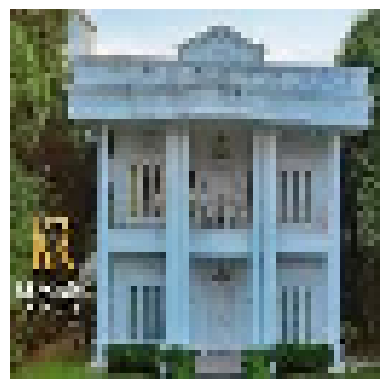

In [5]:
# Load data gambar
def preprocess_image(img_path, target_size=(64, 64)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return img_array_expanded_dims

# Path ke gambar yang diunggah
img_path = '/content/data_inf.jpeg'

# Memuat dan memproses gambar
img_data = preprocess_image(img_path)

# Menampilkan gambar
plt.imshow(img_data[0].astype('uint8'))
plt.axis('off')
plt.show()

Image diresize menjadi 64 x 64 pixel sehingga kualitas gambarnya kurang baik namun mengurangi beban komputasi.

# v. Prediksi

In [6]:
combined_input = [tabular_data, img_data]

# Membuat prediksi
prediksi_price = model.predict(combined_input)
print(f"Prediksi Harga: {prediksi_price[0]}")

1/1 [==============================] - 1s 1s/step
Prediksi Harga: [34175.316]


Setelah gambar dan fitur rumah diinput, model kami memprediksikan harga rumah tersebut sebesar 34175.316 USD atau sekitar 561,637,143.14 rupiah per 3 April 2024 menurut kalkulator kurs Bank Indonesia.